In [1]:
# Download MT-YOLOv6 repository and install requirements
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt
!pip install roboflow

Cloning into 'YOLOv6'...
remote: Enumerating objects: 819, done.
remote: Counting objects: 100% (311/311), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 819 (delta 243), reused 199 (delta 198), pack-reused 508
Receiving objects: 100% (819/819), 1.70 MiB | 7.73 MiB/s, done.
Resolving deltas: 100% (415/415), done.
/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 29.8 MB/s 
     |████████████████████████████████| 13.1 MB 50.8 MB/s 
     |████████████████████████████████| 2.0 MB 49.8 MB/s 
     |████████████████████████████████| 5.2 MB 60.9 MB/s 
     |████████████████████████████████| 232 kB 73.7 MB/s 
     |████████████████████████████████| 51 kB 7.2 MB/s 
  Created wheel for onnx-simplifier: filename=onnx_simplifier-0.4.0-py3-none-any.whl size=5517 sha256=c449b696c5e50a83051be05dad43717941f5c2215deb6848cf7663bf73a1c05b
  Stored in directory: /root/.ca

In [2]:
# REPLACE with your custom code snippet generated above

# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZSpDkDgCLtkUbnmNzw85")
project = rf.workspace("feb-2").project("chess-id")
dataset = project.version(1).download("mt-yolov6")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Chess-ID-1 in mt-yolov6:: 100%|██████████| 588/588 [00:00<00:00, 2092.82it/s]


In [3]:
dataset.location

'/content/YOLOv6/Chess-ID-1'

In [4]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.4 MB/s eta 0:13:53tcmalloc: large alloc 1147494400 bytes == 0x3a28e000 @  0x7fe001889615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:11:45tcmalloc: large alloc 1434370048 bytes == 0x7e8e4000 @  0x7fe001889615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████

In [5]:
import torch
torch.cuda.is_available() 
# torch.cuda.get_device_name(0)

True

In [7]:
# run this cell to begin training
!python tools/train.py --batch 32 --conf configs/yolov6s.py --epochs 100 --img-size 416 --data {dataset.location}/data.yaml --device 0 

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, check_images=False, check_labels=False, conf_file='configs/yolov6s.py', data_path='/content/YOLOv6/Chess-ID-1/data.yaml', device='0', dist_url='env://', epochs=100, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='exp', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp', workers=8, world_size=1)

Train: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 202/202 [00:00<00:00, 1688.24it/s]
Train: Checking formats of labels with 2 process(es): 
202 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 202/202 [00:00<00:00, 2497.46it/s]
Train: Final numbers of valid images: 202/ labels: 202. 
0.4s for dataset initialization.
Val: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 58/58 [00:00<00:00, 737.29it/s]
Val: Checking formats of labels with 2 process(e

In [8]:
# Run evaluation
!python tools/eval.py --data {dataset.location}/data.yaml --img-size 416 --weights runs/train/exp/weights/best_ckpt.pt --device 0 


Namespace(batch_size=32, conf_thres=0.001, data='/content/YOLOv6/Chess-ID-1/data.yaml', device='0', half=False, img_size=416, iou_thres=0.65, name='exp', save_dir='runs/val/', task='val', weights='runs/train/exp/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 18.63
Val: Checking formats of labels with 2 process(es): 
58 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 58/58 [00:00<00:00, 2465.01it/s]
Convert to COCO format
100% 58/58 [00:00<00:00, 18314.36it/s]
Convert to COCO format finished. Resutls saved in Chess-ID-1/annotations/instances_valid.json
Val: Final numbers of valid images: 58/ labels: 58. 
0.3s for dataset initialization.
Inferencing model in val datasets.: 100% 2/2 [00:01<00:00,  1.77it/s]

Evaluating speed.
Average pre-process time: 0.10 ms
Average inference time: 5.27 ms
Average NMS time: 1.30 ms

Evaluating mAP 

In [9]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml --img-size 416 --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/ --device 0


Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_img=True, save_txt=False, source='/content/YOLOv6/Chess-ID-1/images/test/', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Chess-ID-1/data.yaml')
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 29/29 [00:00<00:00, 30.66it/s]
Results saved to runs/inference/exp


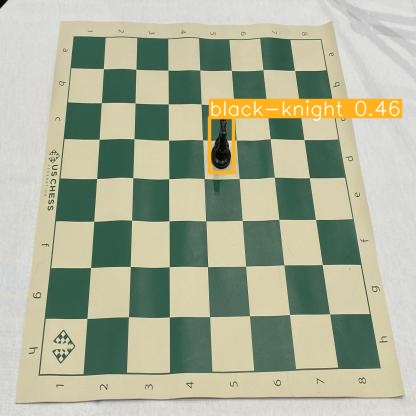

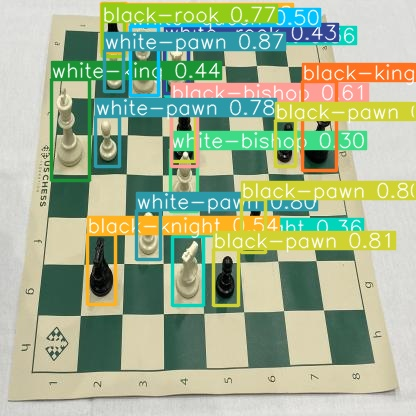

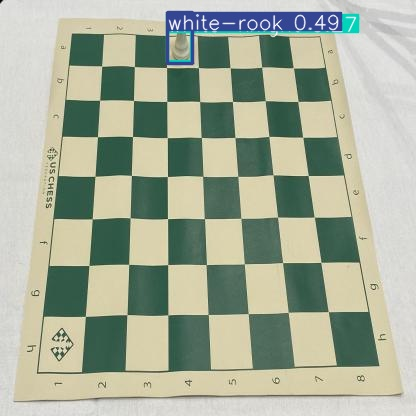

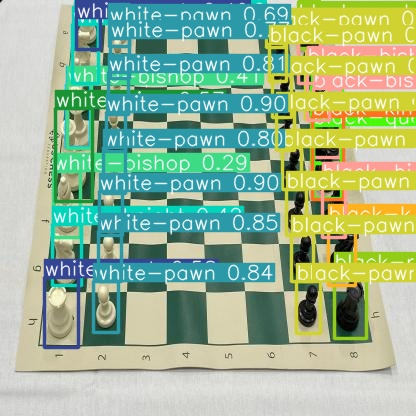

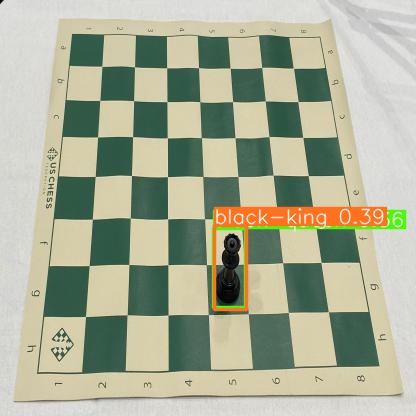

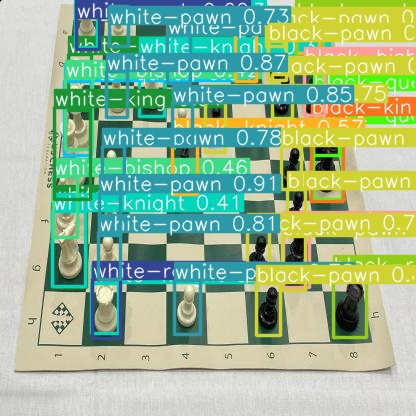

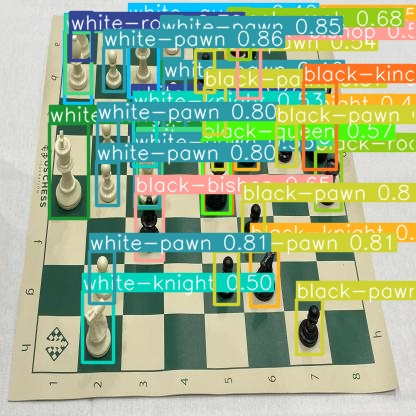

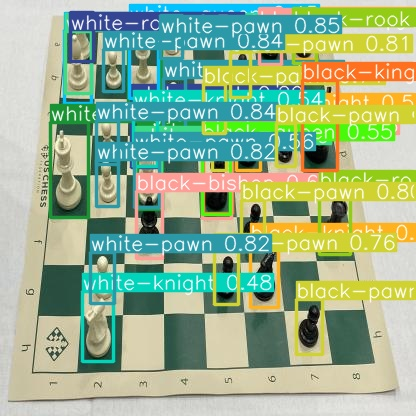

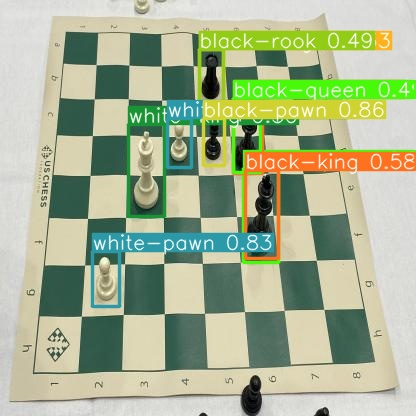

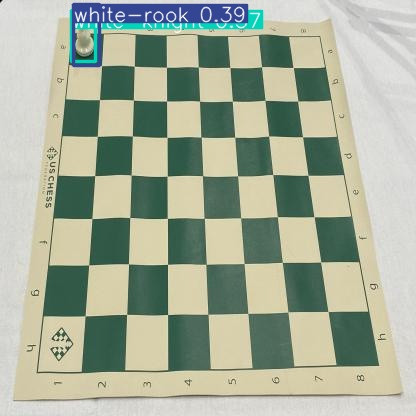

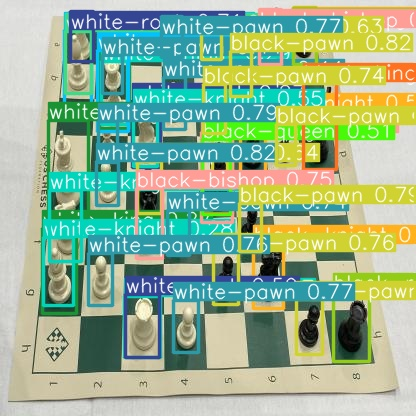

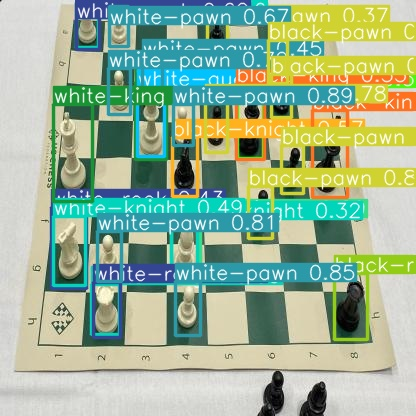

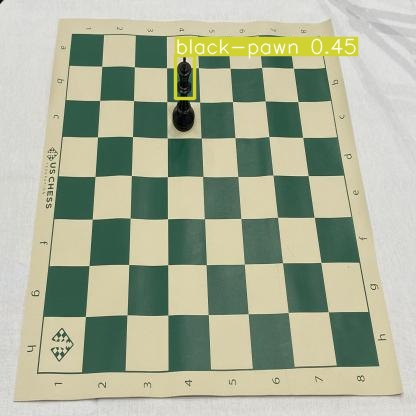

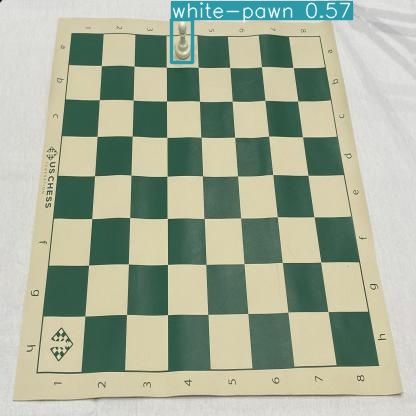

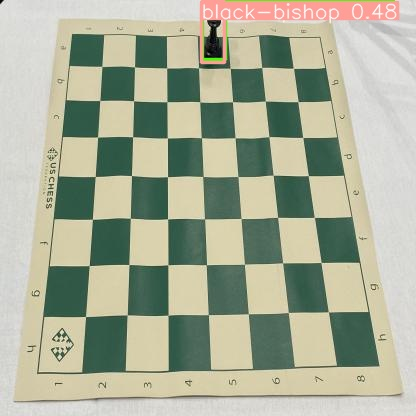

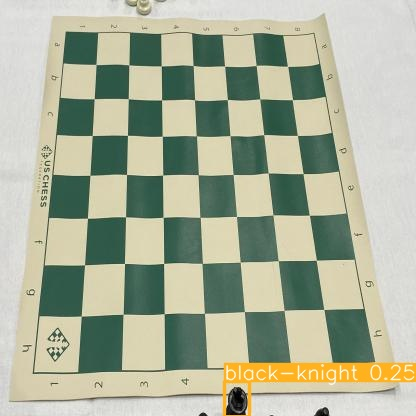

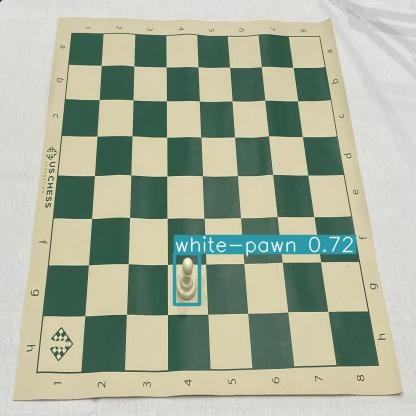

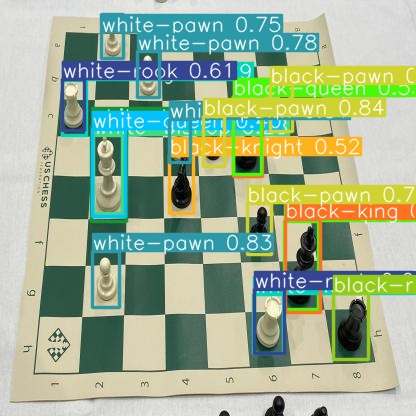

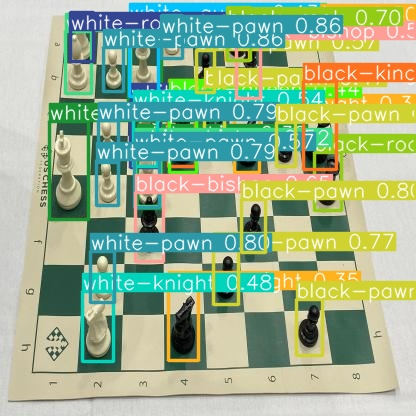

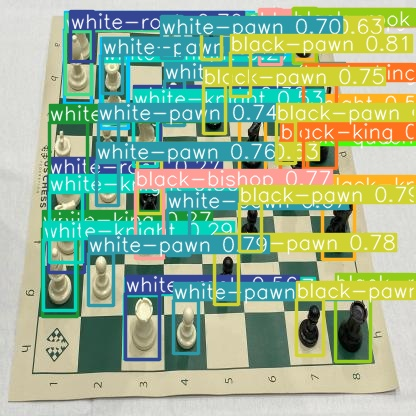

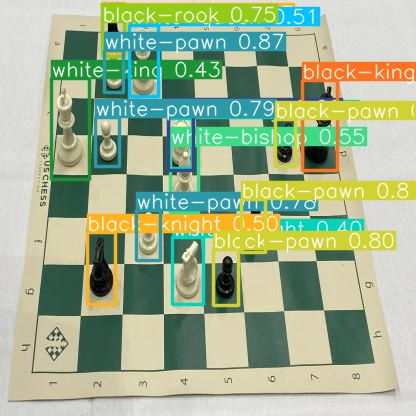

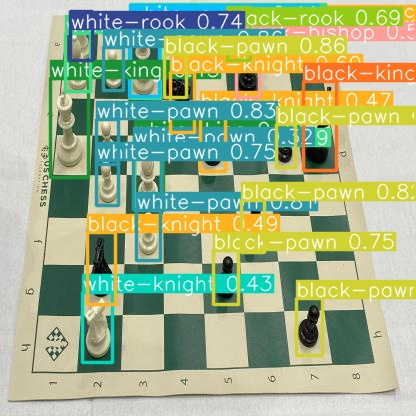

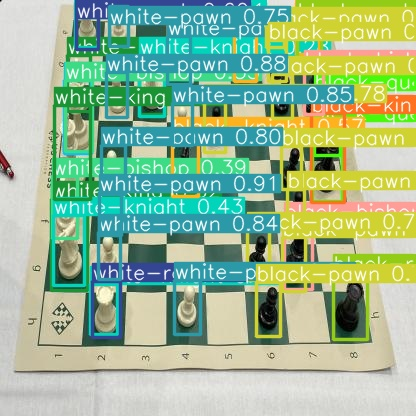

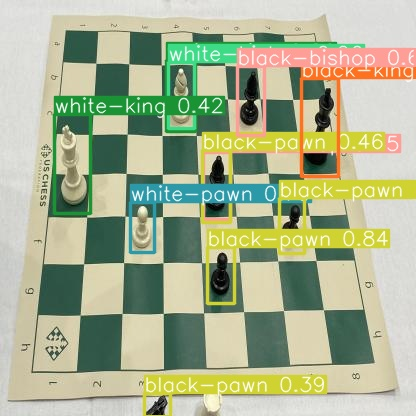

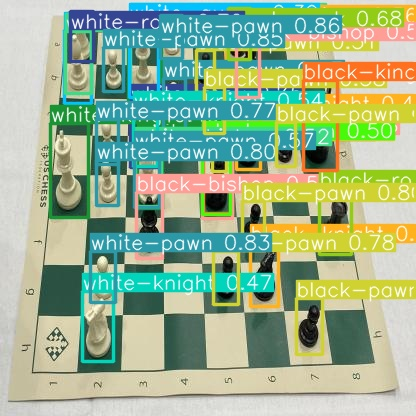

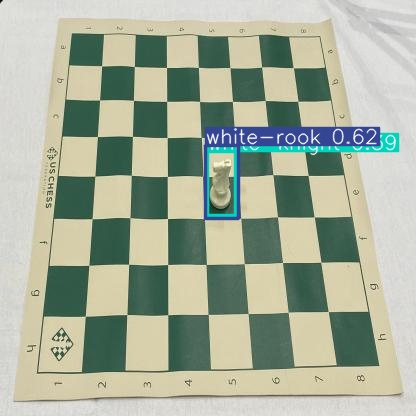

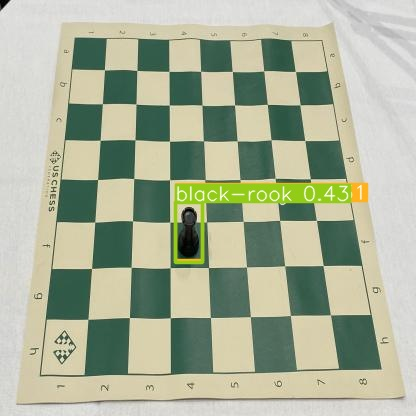

In [10]:
# display test inference result images
import glob
from IPython.display import Image, display

for imageName in glob.glob('./runs/inference/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n\n")

In [12]:
!python deploy/ONNX/export_onnx.py --weights runs/train/exp/weights/best_ckpt.pt --device 0

Namespace(batch_size=1, conf_thres=0.25, device='0', end2end=False, half=False, img_size=[640, 640], inplace=False, iou_thres=0.45, max_wh=None, simplify=False, topk_all=100, weights='runs/train/exp/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...

Starting to export ONNX...
/content/YOLOv6/yolov6/models/effidehead.py:76: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.grid[i].shape[2:4] != y.shape[2:4]:
ONNX export success, saved as runs/train/exp/weights/best_ckpt.onnx

Export complete (6.31s)
